In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

# Introduction
This script will have plots (data visualizations) of H3K9Me3 experiment days that are considered to be crucial to refer back to answer the question of the project. The scripts that include the control plots can be found under script named: `200819_data_visualiztion_h3k9me3_200604-10,50` and `200821_data_visualiztion_h3k9me3_200615-10,50`. 

# Retrieve Data

In [25]:
# 200604 - file to pandas dataframe
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\20200604_h3k9me3'

## 10% threshold 
file=f'{bigDir}\\cellinfo_200604v6_10percent.csv'
data=pd.read_csv(file)
data=data.drop(columns=['Unnamed: 0']) # dropping the unnecessary column
data.to_csv(file) # resaving the csv file

## 50% threshold
file1=f'{bigDir}\\cellinfo_200604v6_50percent.csv'
data1=pd.read_csv(file1)
data1=data1.drop(columns=['Unnamed: 0']) #dropping unnecessary column
data1.to_csv(file1) # resaving the csv file

In [26]:
data.head()

,file,original_name,movie,last frame movie position x,last frame movie position y,ab1 (Heterochromatin),ab1 ch,ab2 (MCM),ab2 ch,DAPI ch,...,temp,nuc_DAPI_total,inner_DAPI_total,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu
0,20200604_cell_00.ciz,200604_09_15_63X.czi,200604xy09,325.986,135.825,H3K9Me3,1,MCM2,2,3,...,0.100020,2.697250e+09,822467048.0,1.874783e+09,628945846.0,454611114.0,174334732.0,2.068304e+09,367855934.0,1.700448e+09
1,20200604_cell_01.ciz,200604_09_46_63X.czi,200604xy09,1103.256,483.760,H3K9Me3,1,MCM2,2,3,...,0.100014,2.321032e+09,899578615.0,1.421453e+09,490617687.0,340295962.0,150321725.0,1.830414e+09,559282653.0,1.271131e+09
2,20200604_cell_02.ciz,200604_09_51_63X.czi,200604xy09,1865.490,559.814,H3K9Me3,1,MCM2,2,3,...,0.100013,2.570708e+09,959263344.0,1.611445e+09,556729653.0,365812625.0,190917028.0,2.013979e+09,593450719.0,1.420528e+09
3,20200604_cell_03.ciz,200604_09_53_63X.czi,200604xy09,601.353,583.042,H3K9Me3,1,MCM2,2,3,...,0.100003,2.176022e+09,779353206.0,1.396669e+09,459623544.0,333437537.0,126186007.0,1.716398e+09,445915669.0,1.270483e+09
4,20200604_cell_04.ciz,200604_09_58_63X.czi,200604xy09,1577.064,627.569,H3K9Me3,1,MCM2,2,3,...,0.100028,2.687250e+09,828964429.0,1.858286e+09,554604150.0,367070421.0,187533729.0,2.132646e+09,461894008.0,1.670752e+09


In [27]:
data1.head()

,Unnamed: 0.1,file,original_name,movie,last frame movie position x,last frame movie position y,ab1 (Heterochromatin),ab1 ch,ab2 (MCM),ab2 ch,...,temp,nuc_DAPI_total,inner_DAPI_total,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu
0,0,20200604_cell_00.ciz,200604_09_15_63X.czi,200604xy09,325.986,135.825,H3K9Me3,1,MCM2,2,...,0.500012,2.697250e+09,822467048.0,1.874783e+09,2.004453e+09,821272403.0,1.183180e+09,692797145.0,1194645.0,691602500.0
1,1,20200604_cell_01.ciz,200604_09_46_63X.czi,200604xy09,1103.256,483.760,H3K9Me3,1,MCM2,2,...,0.500009,2.321032e+09,899578615.0,1.421453e+09,1.796049e+09,887957601.0,9.080914e+08,524982545.0,11621014.0,513361531.0
2,2,20200604_cell_02.ciz,200604_09_51_63X.czi,200604xy09,1865.490,559.814,H3K9Me3,1,MCM2,2,...,0.500041,2.570708e+09,959263344.0,1.611445e+09,1.963019e+09,949256767.0,1.013762e+09,607689731.0,10006577.0,597683154.0
3,3,20200604_cell_03.ciz,200604_09_53_63X.czi,200604xy09,601.353,583.042,H3K9Me3,1,MCM2,2,...,0.500030,2.176022e+09,779353206.0,1.396669e+09,1.617514e+09,769429745.0,8.480846e+08,558507576.0,9923461.0,548584115.0
4,4,20200604_cell_04.ciz,200604_09_58_63X.czi,200604xy09,1577.064,627.569,H3K9Me3,1,MCM2,2,...,0.500053,2.687250e+09,828964429.0,1.858286e+09,1.979640e+09,817325173.0,1.162315e+09,707610736.0,11639256.0,695971480.0


# Plots
* note to myself
    ## necessary plots:
#11, #11-boxplot, MCM_het/MCM_total, MCM_eu/MCM_total

<IPython.core.display.Javascript object>


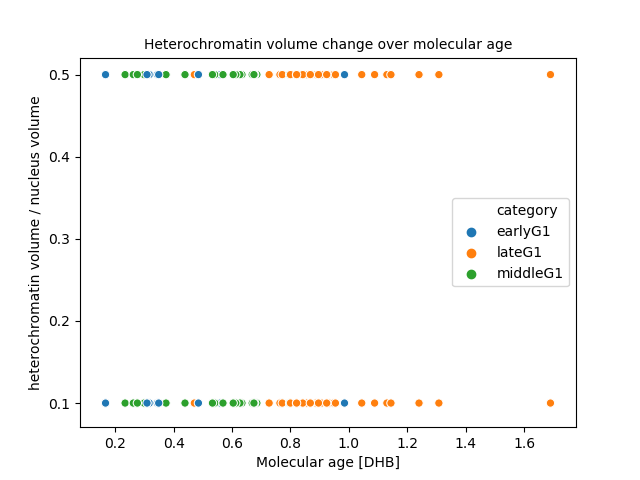

In [30]:
%matplotlib notebook
data['temp']=data.nuc_vol_het/data.nuc_vol_total
data1['temp']=data1.nuc_vol_het/data1.nuc_vol_total

ax=sn.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]),:],hue='category')
sn.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')

plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('Heterochromatin volume change over molecular age',fontsize=10)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:4], labels[:4])

## 11.  mcm/dapi in heterochromatin/nucleus pixels vs molecular age

<IPython.core.display.Javascript object>


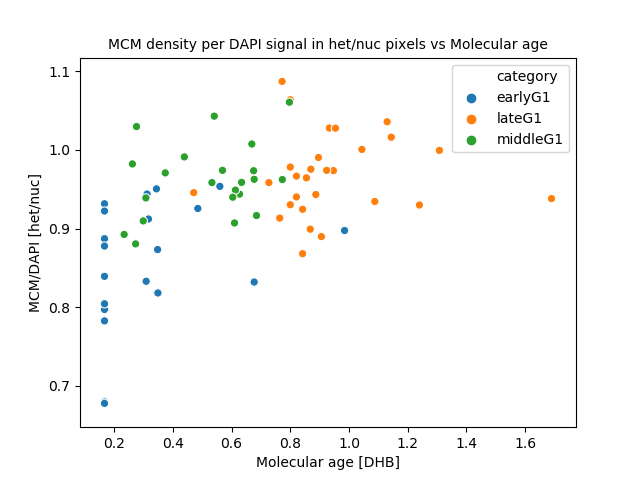

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [19]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sn.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age', fontsize=10)

<IPython.core.display.Javascript object>


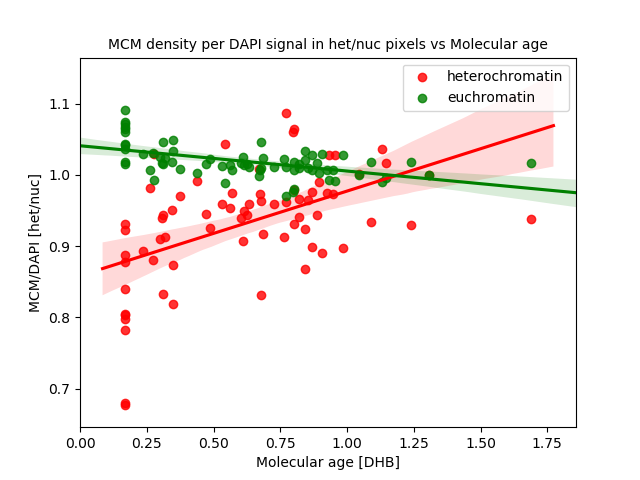

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [20]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sn.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :],color='r',label='heterochromatin')

data['temp']=(data.nuc_mcm_eu/data.nuc_DAPI_eu)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sn.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], color='g', label='euchromatin')

plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age', fontsize=10)

## 1.	How is heterochromtin/nucleus volume changing with molecular age?

<IPython.core.display.Javascript object>


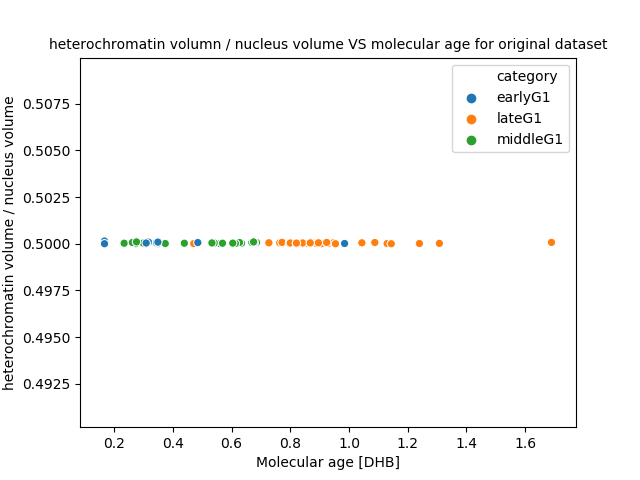

Text(0.5, 1.0, 'heterochromatin volumn / nucleus volume VS molecular age for original dataset')

In [26]:
%matplotlib notebook
data1['temp']=data1.nuc_vol_het/data1.nuc_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volumn / nucleus volume VS molecular age for original dataset',fontsize=10)

<IPython.core.display.Javascript object>


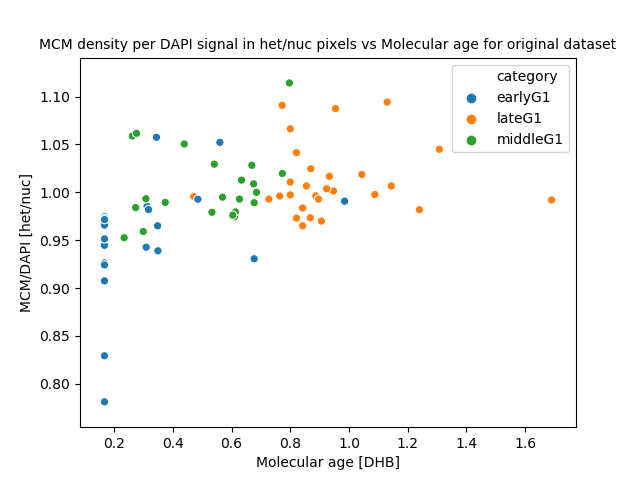

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age for original dataset')

In [37]:
%matplotlib notebook
data1['temp']=(data1.nuc_mcm_het/data1.nuc_DAPI_het)/(data1.nuc_mcm_total/data1.nuc_DAPI_total)
sn.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age for original dataset', fontsize=10)

<IPython.core.display.Javascript object>


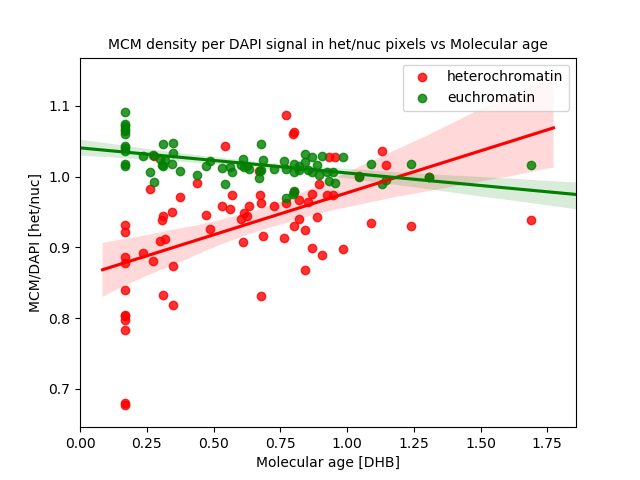

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [5]:
%matplotlib notebook
data1['temp']=(data1.nuc_mcm_het/data1.nuc_DAPI_het)/(data1.nuc_mcm_total/data1.nuc_DAPI_total)
sn.regplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :],color='r',label='heterochromatin')

data1['temp']=(data1.nuc_mcm_eu/data1.nuc_DAPI_eu)/(data1.nuc_mcm_total/data1.nuc_DAPI_total)
sn.regplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :], color='g', label='euchromatin')

plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age', fontsize=10)